

ODESolve(f = derivatives(t,y), y0 = ICs, tspan = [0 tfinal], h)

EulerStep(f = derivatives, y = value, t = time, h = step)
      return value of y at t+h


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simple pendulum example, SAA

$$
\ddot{\theta} \approx - \frac{g}{l} \theta
$$

$$
\vec{y} = [\theta, \dot{\theta}]
$$

In [2]:
g = 9.8
l = 1

def pendulumDerivs(t,y):
  if(len(y)!=2):
    print("Error, n!=2 in pendulum equations")
  theta = y[0]
  thetadot = y[1]
  return np.array([thetadot, -g/l*theta])


In [3]:

def ODESolve(f,y0,tspan,h):
  t = tspan[0]
  tfinal = tspan[-1]
  y = y0
  ylist = np.ndarray((len(tspan),len(y0)))
  ylist[0] = np.array(y)
  nextI = 1
  while(t<tfinal):
    ynew = RK4Step(f,y,t,h)
    tnew = t + h
    checkSteps= True
    while(checkSteps):
      maybe = False
      if(tnew>tspan[nextI]):
        ylist[nextI] = y + (tspan[nextI]-t)/h*(ynew-y)
        nextI += 1
        maybe = True
      if(maybe and nextI<len(tspan)-1):
        checkSteps = True
      else:
        checkSteps = False
      
    t = tnew
    y = ynew
  if(nextI<len(tspan)-1):
    ylist[nextI]=y

  return ylist
  

In [ ]:
def EulerStep(f,y,t,h):
  change = f(t,y)*h
  return(y+change)

$$
y(t+h) = y(t) + a k_1 + b k_2
$$

$$
k_1  = h f(t,y)
$$

$$
k_2 = h f(t+\alpha h, y + \beta k_1)
$$

In [ ]:
# a + b = 1
# alpha = beta = (1/(2b))

a = -100
b = 1 - a
alpha = 1/(2*b)
beta = 1/(2*b)
def RK2Step(f,y,t,h):
  k1 = f(t,y)*h
  k2 = f(t+alpha*h,y+beta*k1)*h
  return(y+a*k1+b*k2)

In [4]:
def RK4Step(f,y,t,h):
  k1 = f(t,y)*h
  k2 = f(t+0.5*h,y+0.5*k1)*h
  k3 = f(t+0.5*h,y+0.5*k2)*h
  k4 = f(t+h,y+k3)*h
  return(y+(k1+2*k2+2*k3+k4)/6)

In [ ]:
theta0 = 0.1
y0 = np.array([theta0 , 0])
tspan = np.linspace(0,20,1000)
solution = ODESolve(pendulumDerivs,y0,tspan,0.001)

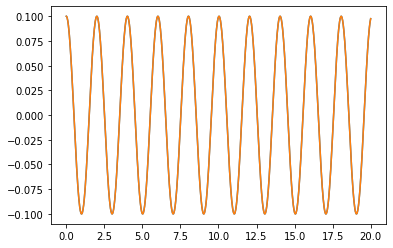

In [ ]:
plt.plot(tspan,theta0*np.cos(np.sqrt(g/l)*tspan))
plt.plot(tspan,solution[:,0])
plt.show()

In [5]:
def aveAbsError(tspan,solution):
  return np.sum(np.abs(theta0*np.cos(np.sqrt(g/l)*tspan)-solution[:,0]))/len(tspan)

In [ ]:
print(aveAbsError(tspan,solution))

5.182401497261116e-10


In [9]:
theta0 = 0.1
y0 = np.array([theta0 , 0])
tspan = np.linspace(0,20,1000)

h = 0.1
solution = []
timestep = []
i = 0
while i < 5:
  solution.append(np.array(ODESolve(pendulumDerivs,y0,tspan,h)))
  timestep.append(h)
  h = h*.1 #decrease timestep by 0.1 every iteration
  i = i+1
solution = np.array(solution)


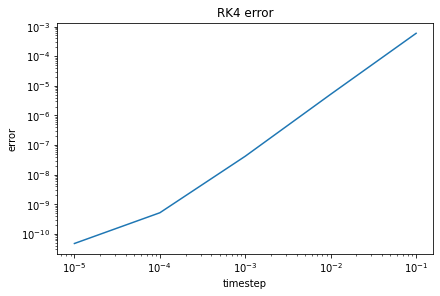

In [10]:
error = []
for i in solution:
  error.append(aveAbsError(tspan,i))


fig, ax = plt.subplots(constrained_layout = True) 
ax.loglog(timestep, error) 
ax.set_xlabel('timestep') 
ax.set_ylabel('error') 
ax.set_title('RK4 error') 
plt.show()